# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=metric"
api = "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + units + api
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulladulla
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | konosha
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | juneau
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | magadan
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | ta`u
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | voranava
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | matoury
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | ahau
City not found. Skipping...
Processing Record 

In [5]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from api_keys import weather_api_key
#https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid={API key}&units=metric

# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&"
units = "metric"
api = "&appid=" + weather_api_key

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
requests.get(query_url).json()

{'coord': {'lon': -2.15, 'lat': 57},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 9.84,
  'feels_like': 4.91,
  'temp_min': 9.65,
  'temp_max': 10.38,
  'pressure': 962,
  'humidity': 87,
  'sea_level': 962,
  'grnd_level': 962},
 'visibility': 10000,
 'wind': {'speed': 16.4, 'deg': 213, 'gust': 26.68},
 'clouds': {'all': 100},
 'dt': 1705881098,
 'sys': {'type': 2,
  'id': 2031790,
  'country': 'GB',
  'sunrise': 1705825700,
  'sunset': 1705853444},
 'timezone': 0,
 'id': 2641549,
 'name': 'Newtonhill',
 'cod': 200}

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulladulla,-35.3500,150.4667,23.20,70,32,4.39,AU,1705904145
1,waitangi,-43.9535,-176.5597,18.79,92,100,4.92,NZ,1705904145
2,afaahiti,-17.7500,-149.2833,22.93,81,100,7.91,PF,1705904146
3,konosha,60.9736,40.2570,-10.83,92,100,4.35,RU,1705904146
4,jamestown,42.0970,-79.2353,-12.55,93,0,3.09,US,1705904128


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,23.20,70,32,4.39,AU,1705904145
1,waitangi,-43.9535,-176.5597,18.79,92,100,4.92,NZ,1705904145
2,afaahiti,-17.7500,-149.2833,22.93,81,100,7.91,PF,1705904146
3,konosha,60.9736,40.2570,-10.83,92,100,4.35,RU,1705904146
4,jamestown,42.0970,-79.2353,-12.55,93,0,3.09,US,1705904128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
city_data_df['Lat']

City_ID
0     -34.5322
1      49.4169
2      39.1200
3     -17.2333
4      28.6290
        ...   
560    48.4001
561    18.0800
562    -3.8004
563    61.7333
564     1.7284
Name: Lat, Length: 565, dtype: float64

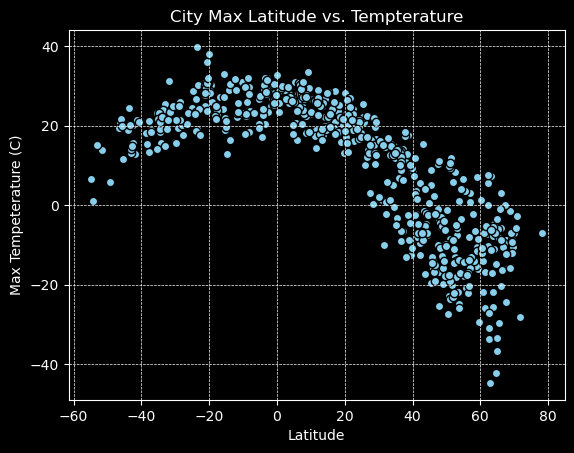

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempterature")
plt.xlabel("Latitude")
plt.ylabel("Max Tempeterature (C)")
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

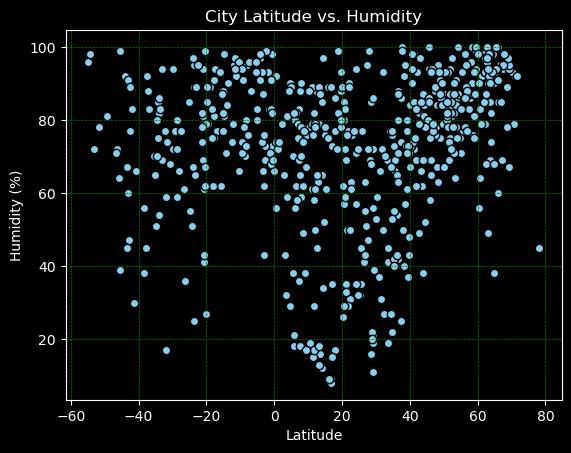

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

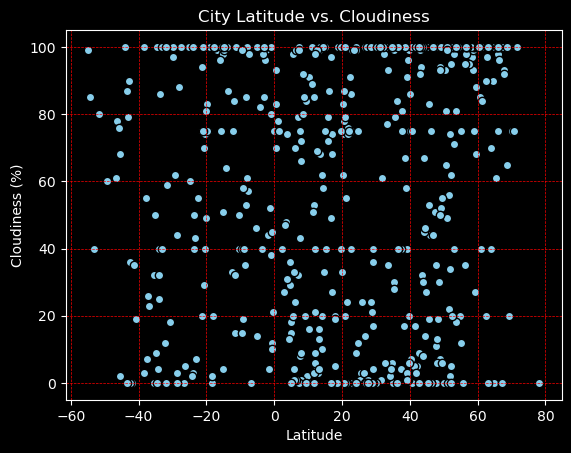

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df["Cloudiness"], edgecolors="Black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="red", linestyle= "--", linewidth= 0.5)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

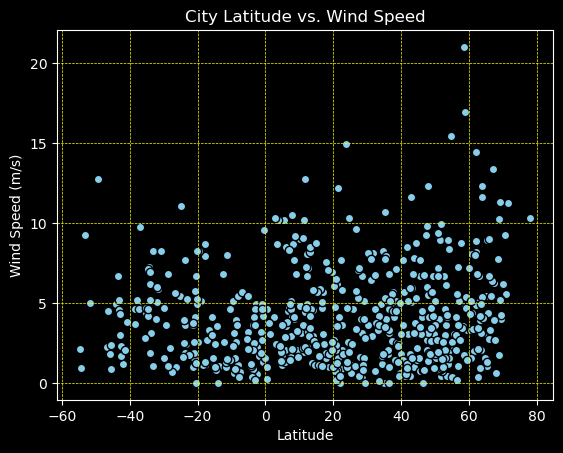

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df["Wind Speed"], edgecolors="Black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(color="yellow", linestyle= "--", linewidth= 0.5)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots

def plot_linear(x_values, y_values, y_title, text_coordinates):

    correlation = linregress(x_values,y_values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x=x_values, y=y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red", )
    plt.xlabel("Latitude")
    plt.ylabel(y_title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,konosha,60.9736,40.2570,-10.83,92,100,4.35,RU,1705904146
4,jamestown,42.0970,-79.2353,-12.55,93,0,3.09,US,1705904128
5,juneau,58.3019,-134.4197,-6.61,100,100,3.36,US,1705904148
7,magadan,59.5667,150.8000,-29.71,99,68,1.75,RU,1705904149
14,lompoc,34.6391,-120.4579,14.87,76,100,8.23,US,1705904153


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulladulla,-35.3500,150.4667,23.20,70,32,4.39,AU,1705904145
1,waitangi,-43.9535,-176.5597,18.79,92,100,4.92,NZ,1705904145
2,afaahiti,-17.7500,-149.2833,22.93,81,100,7.91,PF,1705904146
6,port-aux-francais,-49.3500,70.2167,5.72,81,60,12.75,TF,1705904148
8,uturoa,-16.7333,-151.4333,27.27,77,99,3.29,PF,1705904149


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8582088311812156


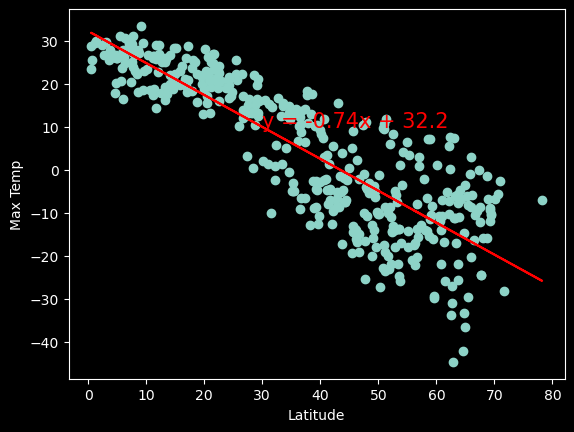

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear(x_values, y_values, "Max Temp", (30,10))


The r-value is: 0.5935657363802836


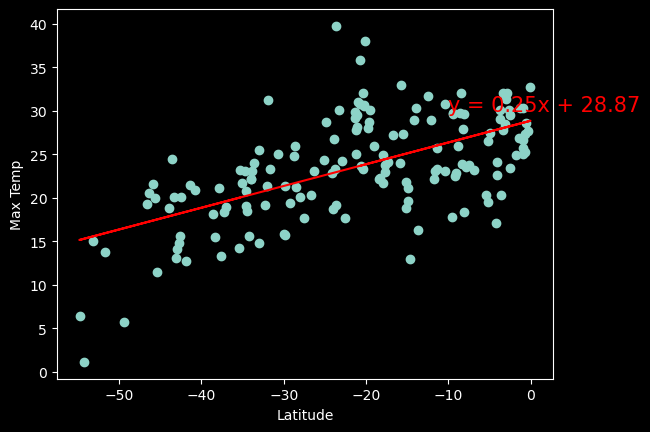

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear(x_values, y_values, "Max Temp", (-10,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4374822502416721


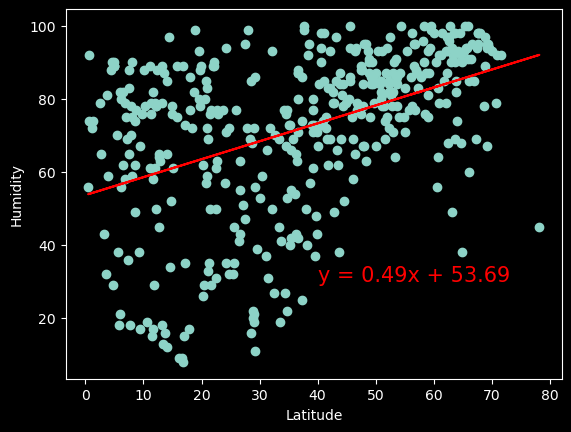

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear(x_values, y_values, y_title="Humidity", text_coordinates=(40,30))

The r-value is: 0.23391990479124342


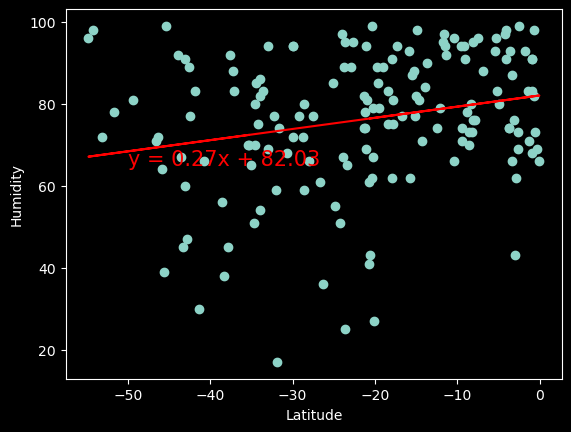

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear(x_values, y_values, y_title="Humidity", text_coordinates=(-50,65))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.303506052911356


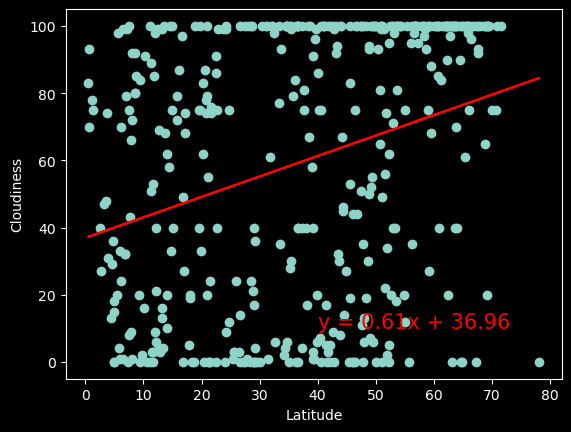

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear(x_values, y_values, y_title="Cloudiness", text_coordinates=(40,10))

The r-value is: 0.14770550069264884


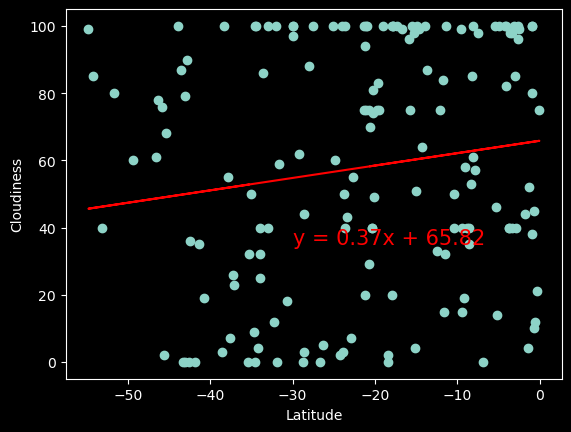

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear(x_values, y_values, y_title="Cloudiness", text_coordinates=(-30,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07790998803494482


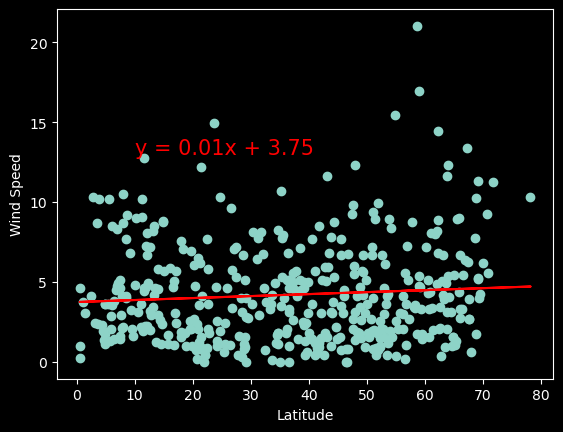

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear(x_values, y_values, y_title="Wind Speed", text_coordinates=(10,13))

The r-value is: -0.24480282300572748


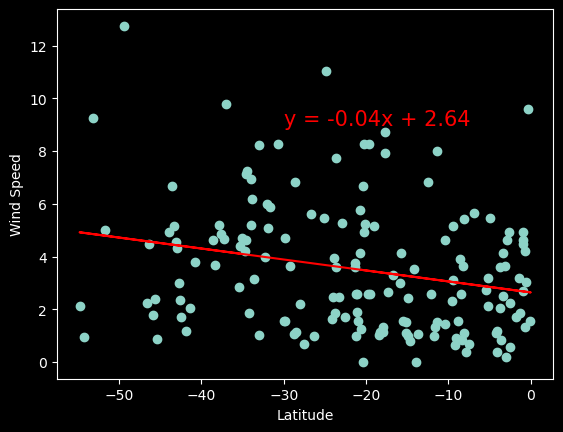

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear(x_values, y_values, y_title="Wind Speed", text_coordinates=(-30,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE